In [49]:
'''
1. Title: Qualitative_Bankruptcy database

2. Source Information
   -- Creator:  Martin.A, Uthayakumar.j and Nadarajan.m (uthayakumar17691@gmail.com)
   -- Guided By: Dr.V.Prasanna Venkatesan
   -- Date:      February 2014

3. Past Usage:
The attributes or parameters which we used for collecting the dataset is referred from the paper"The discovery of expertsí 
decision rules from qualitative bankruptcy data using genetic algorithms" by Myoung-Jong Kim*, Ingoo Han.
 
4. Number of Instances: 250 
 
5. Number of Attributes: 6, each corresponding to Qualitative Parameters in Bankruptcy
 
6. Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
 
     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

7899771793




Internal Risks: 	
i.Industry risk (IR) : 
	Government policies and International agreements, 
	Cyclicality, 
	Degree of competition,				
	The price and stability of market supply,
	The size and growth of market demand,	
	The sensitivity to changes in macroeconomic factors,
	Domestic and international competitive power, 
	Product Life Cycle.
ii.Management risk(MR): 
	Ability and competence of management, 
	Stability of management,
	The relationship between management/ owner, 
	Human resources management, 
	Growth process/business performance, 
	Short and long term business planning, 
	achievement and feasibility. 
iii.Financial Flexibility(FF): 
	Direct financing, 
	Indirect financing, 
	Other financing 
iv.Credibility (CR):  
	Credit history,  
	reliability of information, 
	The relationship with financial institutes.
v.Competitiveness (CO):  
	Market position, 
	The level of core capacities, 
	Differentiated strategy, 
vi.Operating Risk (OP):  
	The stability and diversity of procurement, 
	The stability of transaction, 
	The efficiency of production, 
	The prospects for demand for product and service, 
	Sales diversification,
	Sales price and settlement condition, 
	Collection of A/R,
	Effectiveness of sale network.
 
7. Missing Attribute Values: None
 
8. Class Distribution: [143 instances For Non-Bankruptcy] [107 instances For Bankruptcy]
        Information about the dataset
  	CLASSTYPE: nominal

'''

'\n1. Title: Qualitative_Bankruptcy database\n\n2. Source Information\n   -- Creator:  Martin.A, Uthayakumar.j and Nadarajan.m (uthayakumar17691@gmail.com)\n   -- Guided By: Dr.V.Prasanna Venkatesan\n   -- Date:      February 2014\n\n3. Past Usage:\nThe attributes or parameters which we used for collecting the dataset is referred from the paper"The discovery of expertsí \ndecision rules from qualitative bankruptcy data using genetic algorithms" by Myoung-Jong Kim*, Ingoo Han.\n \n4. Number of Instances: 250 \n \n5. Number of Attributes: 6, each corresponding to Qualitative Parameters in Bankruptcy\n \n6. Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)\n \n     1. Industrial Risk: {P,A,N}\n     2. Management Risk: {P,A,N}\n     3. Financial Flexibility: {P,A,N}\n     4. Credibility: {P,A,N}\n     5. Competitiveness: {P,A,N}\n     6. Operating Risk: {P,A,N}\n     7. Class: {B,NB}\n\n7899771793\n\n\n\n\nInternal Risks: \t\ni.Industry risk (IR) : \n\

In [50]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
#Question 1. Read the dataset and understand the features and target variable
colnames = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness',
                      'Operating Risk','Class']
bankruptcy = pd.read_csv("drive-download-data/Qualitative_Bankruptcy.csv", names = colnames)


In [52]:
bankruptcy.head(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


In [53]:
bankruptcy.shape

(250, 7)

In [54]:
bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [55]:
bankruptcy['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [56]:
# Question 2. Encode independent features
# Have used replace method of encoding for independent features
# The nominal values in bankruptcy dataset are converted to numeric values for performing feature selection. 
# The values of each of the descriptors are replaced with P=1, A=0.5 and N=0, 
# representing the range for positive, average and negative values

In [57]:
# Making a copy of bankruptcy and applying encoding to the independent features


bankruptcy_cat = bankruptcy.copy()
for column in bankruptcy_cat[['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness',
                      'Operating Risk','Class']]:
    replace_map = {column: {'P': 1, 'A': 0.5, 'N': 0}}
    bankruptcy_cat.replace(replace_map, inplace=True)
bankruptcy_cat.head(10)
    

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,1.0,1.0,0.5,0.5,0.5,1.0,NB
1,0.0,0.0,0.5,0.5,0.5,0.0,NB
2,0.5,0.5,0.5,0.5,0.5,0.5,NB
3,1.0,1.0,1.0,1.0,1.0,1.0,NB
4,0.0,0.0,1.0,1.0,1.0,0.0,NB
5,0.5,0.5,1.0,1.0,1.0,0.5,NB
6,1.0,1.0,0.5,1.0,1.0,1.0,NB
7,1.0,1.0,1.0,0.5,0.5,1.0,NB
8,1.0,1.0,0.5,1.0,0.5,1.0,NB
9,1.0,1.0,0.5,0.5,1.0,1.0,NB


In [58]:
# Now converting the "Class" Target categorial variable to Numeric
# 'NB' : Not Bankrupt is replaced by 0
# 'B' : Bankrupt is replaced by 1

def class_to_numeric(x):
    if x=='NB':
        return 0
    if x=='B':
        return 1

bankruptcy_cat["Class"] = bankruptcy_cat['Class'].apply(class_to_numeric)
bankruptcy_cat["Class"]


0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: Class, Length: 250, dtype: int64

In [59]:
bankruptcy_cat

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,1.0,1.0,0.5,0.5,0.5,1.0,0
1,0.0,0.0,0.5,0.5,0.5,0.0,0
2,0.5,0.5,0.5,0.5,0.5,0.5,0
3,1.0,1.0,1.0,1.0,1.0,1.0,0
4,0.0,0.0,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...
245,0.0,0.0,0.5,0.0,0.0,0.0,1
246,1.0,0.0,0.0,0.0,0.0,0.0,1
247,0.5,0.0,0.0,0.0,0.0,0.0,1
248,0.0,0.0,0.0,0.0,0.0,0.0,1


In [60]:
# correlation between components and features
bankruptcy_cat.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
Industrial Risk,1.000000,0.255127,0.162624,0.014438,0.257814,0.144507,-0.227823
Management Risk,0.255127,1.000000,0.254845,0.303341,0.306568,0.213874,-0.370838
Financial Flexibility,0.162624,0.254845,1.000000,0.524951,0.686612,0.116903,-0.751020
Credibility,0.014438,0.303341,0.524951,1.000000,0.675689,0.288458,-0.755909
Competitiveness,0.257814,0.306568,0.686612,0.675689,1.000000,0.211383,-0.899452
Operating Risk,0.144507,0.213874,0.116903,0.288458,0.211383,1.000000,-0.279786
Class,-0.227823,-0.370838,-0.751020,-0.755909,-0.899452,-0.279786,1.000000


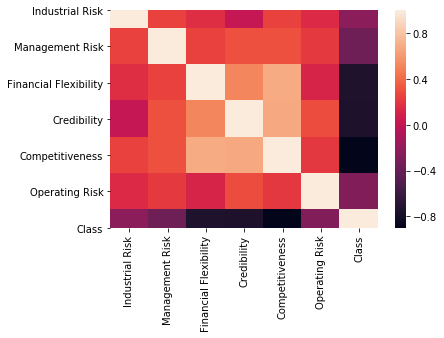

In [61]:
# correlation with the help of heatmap
sns.heatmap(bankruptcy_cat.corr())
# From the below correction map, we can see that "Financial Flexibility", "Credibility" and "Competitiveness" are 
# strongly corelated to each other. 

# The other components are also corelated but not to a huge extend 


In [62]:
# Question 3. Separate the dependant variable from the rest of the train data
array = bankruptcy_cat.values
X = array[:,0:6]  
Y = array[:,6] 


In [63]:
bankruptcy_cat.groupby(["Class"]).count()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
Class,,,,,,
0,143,143,143,143,143,143
1,107,107,107,107,107,107


In [64]:
# Question 4. Split the dataset into training and test data ( Take 80:20 ratio)
from sklearn.model_selection import train_test_split
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [19]:
# Question 5. Apply PCA on the independent features of train data
# Applying PCA with 3 components 
from sklearn.decomposition import PCA
pca_3=PCA(n_components=3) 
pca_3.fit(X_train) 
X_3_pca=pca_3.transform(X_train) 

#let's check the shape of X_pca array
print("shape of X_3_pca", X_3_pca.shape)


shape of X_3_pca (200, 3)


In [65]:
ex_3_variance=np.var(X_3_pca,axis=0)
ex_3_variance_ratio = ex_3_variance/np.sum(ex_3_variance)
print(ex_3_variance_ratio) 

[0.56104161 0.23656158 0.20239681]


In [66]:
# Applying PCA with 2 components 
from sklearn.decomposition import PCA
pca_2=PCA(n_components=2) 
pca_2.fit(X_train) 
X_2_pca=pca_2.transform(X_train) 

#let's check the shape of X_pca array
print("shape of X_2_pca", X_2_pca.shape)


shape of X_2_pca (200, 2)


In [67]:
ex_2_variance=np.var(X_2_pca,axis=0)
ex_2_variance_ratio = ex_2_variance/np.sum(ex_2_variance)
print(ex_2_variance_ratio) 

[0.70340944 0.29659056]


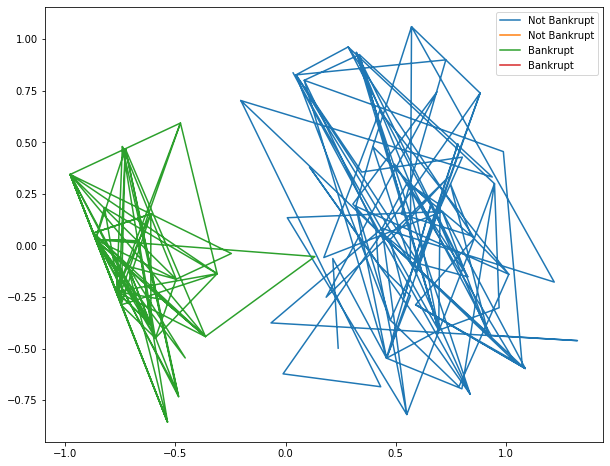

In [68]:
fig = plt.figure(1, figsize=(10, 8))

plt.plot(X_2_pca[y_train == 0, 0], X_2_pca[y_train == 0, 1], 0, label='Not Bankrupt')
plt.plot(X_2_pca[y_train == 1, 0], X_2_pca[y_train == 1, 1], 1, label='Bankrupt')
plt.legend(loc=0)

plt.show()

In [69]:
# Exploring PCA = 2
# Check EigenVectors or PC 1/2
pca_2.components_

array([[ 0.21070322,  0.31137233,  0.47349516,  0.50033464,  0.57512956,
         0.23096536],
       [-0.56791863, -0.32176598,  0.27062522,  0.24925437,  0.19658579,
        -0.63239494]])

In [70]:
pca_2.explained_variance_

array([0.46022879, 0.19405414])

In [71]:
pca_2.explained_variance_ratio_

array([0.4319028 , 0.18211057])

In [72]:
# Exploring PCA = 3
# Check EigenVectors or PC 1/2
pca_3.components_

array([[ 0.21070322,  0.31137233,  0.47349516,  0.50033464,  0.57512956,
         0.23096536],
       [-0.56791863, -0.32176598,  0.27062522,  0.24925437,  0.19658579,
        -0.63239494],
       [-0.48013786, -0.44181495, -0.06133058,  0.2412759 , -0.03146428,
         0.71505362]])

In [73]:
pca_3.explained_variance_

array([0.46022879, 0.19405414, 0.1660284 ])

In [74]:
pca_3.explained_variance_ratio_

array([0.4319028 , 0.18211057, 0.15580975])

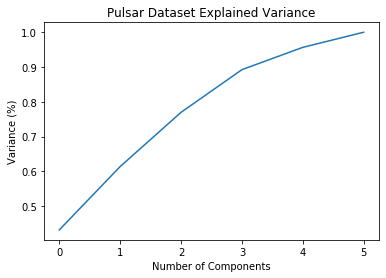

In [75]:
# Question 6: Display elbow plot to find out reduced number of dimensions 
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [ ]:
# This plot tells us that selecting 4 components we can preserve around 95% of the total variance of the data. 
# It makes sense, we’ll not use 100% of our variance, because it denotes all components, 
# and we want only the principal ones.

# With this information in our hands, we can implement the PCA for 4 best components


In [76]:
# Question 7. Transform the data using PCA ( select optimum number of PCAs).
# PCA selected is 4
from sklearn import metrics  ## For calculation of MSE & RMSE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)

In [77]:
# Question 8: Apply KMeans algorithm on the above transformed data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Let us check optimal number of clusters-
# X_train_pca
cluster_range = range( 1, 6)   # expect few clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errs = []
cluster_sil_scores = []
for number_of_clusters in cluster_range:
  clusters = KMeans( number_of_clusters, n_init = 100, init='k-means++' , random_state=0)
  clusters.fit(X_train_pca)
  labels = clusters.labels_                     
  centroids = clusters.cluster_centers_         
  cluster_errs.append( clusters.inertia_ )     

clu_df = pd.DataFrame( { "number_of_clusters":cluster_range, "cluster_errs": cluster_errs} )
clu_df[0:100]

,number_of_clusters,cluster_errs
0,1,189.247351
1,2,109.854054
2,3,89.290415
3,4,76.039733
4,5,65.577357


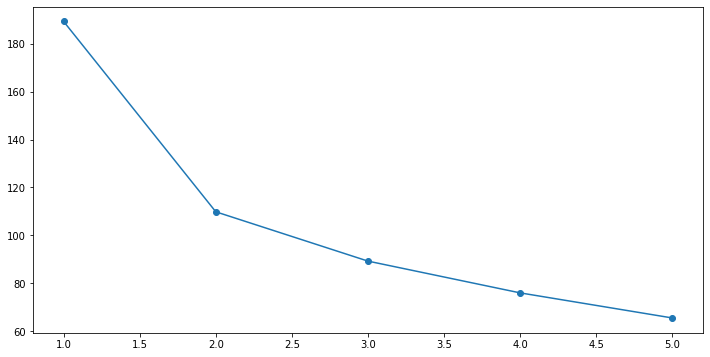

In [78]:
plt.figure(figsize=(12,6))
plt.plot( clu_df.number_of_clusters, clu_df.cluster_errs, marker = "o" )

In [79]:
# Observation from above by elbow plot, we can determine that number of clusters are 2

In [80]:
# Question 9: Select optimal number of clusters and form clusters out of the train data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

clust_range = range(2, 7)
print(clust_range)
X_std = StandardScaler().fit_transform(X_train)
y_std = y_train
X = X_std 
y = y_std.flatten()

print(X.shape)
print(X)
type(X)
print(X.ndim)
print(y.shape)
type(y)
print(y.ndim)
print(y)

range(2, 7)
(200, 6)
[[-1.10782342 -0.90565411 -0.88428424  0.07138811 -1.03576414  0.16698964]
 [-1.10782342 -0.90565411  0.35247694  0.07138811  0.10243821 -0.98466305]
 [ 1.3540064   0.29388776  1.58923812  1.26119     1.24064057 -0.98466305]
 ...
 [ 1.3540064  -0.90565411  0.35247694  0.07138811  0.10243821  1.31864233]
 [ 0.12309149  1.49342962 -0.88428424  0.07138811 -1.03576414 -0.98466305]
 [-1.10782342  0.29388776 -0.88428424 -1.11841378 -1.03576414 -0.98466305]]
2
(200,)
1
[1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 

For number_clusters = 2 The average silhouette_score is : 0.3400515814818414


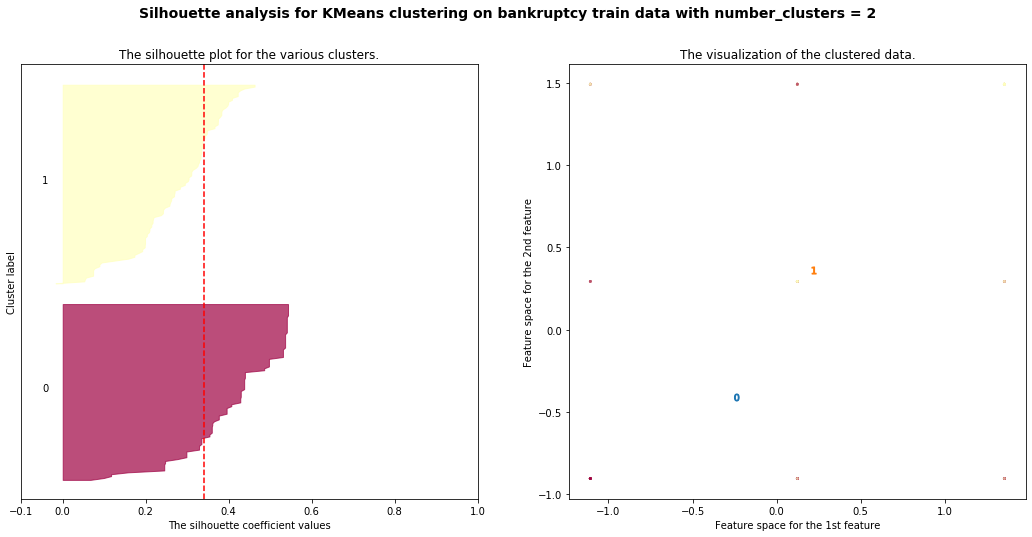

For number_clusters = 3 The average silhouette_score is : 0.292441798974923


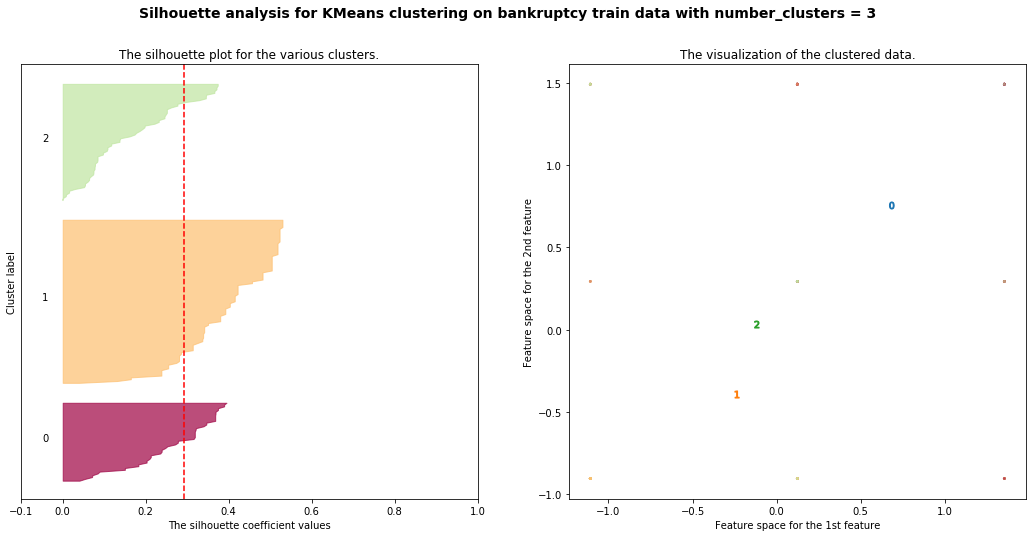

For number_clusters = 4 The average silhouette_score is : 0.23754782398497526


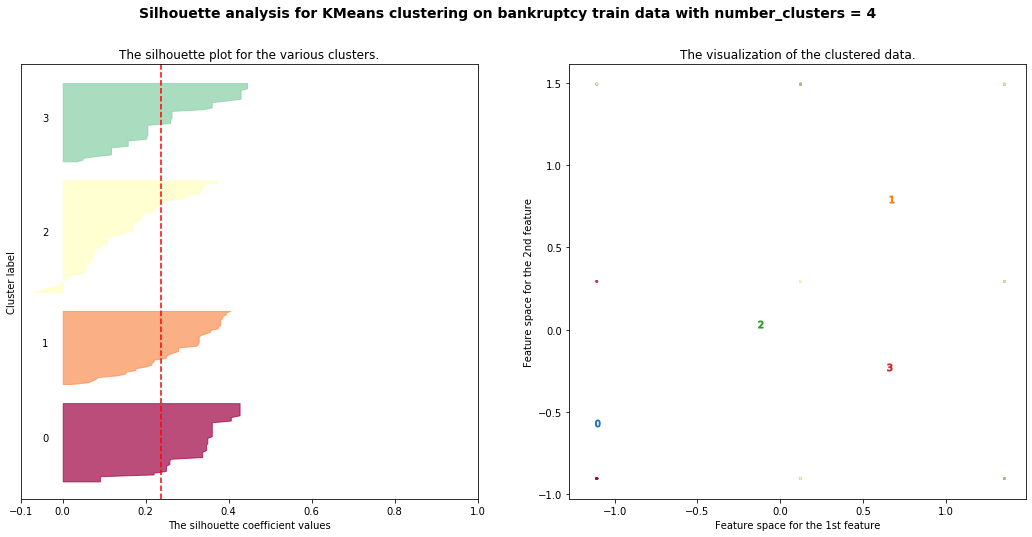

For number_clusters = 5 The average silhouette_score is : 0.24139387600264134


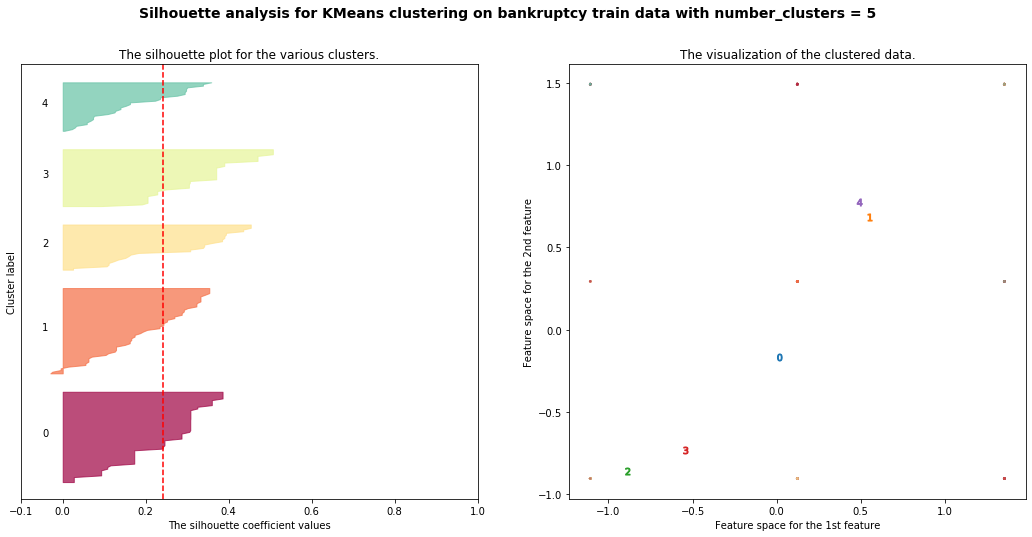

For number_clusters = 6 The average silhouette_score is : 0.2584241597571229


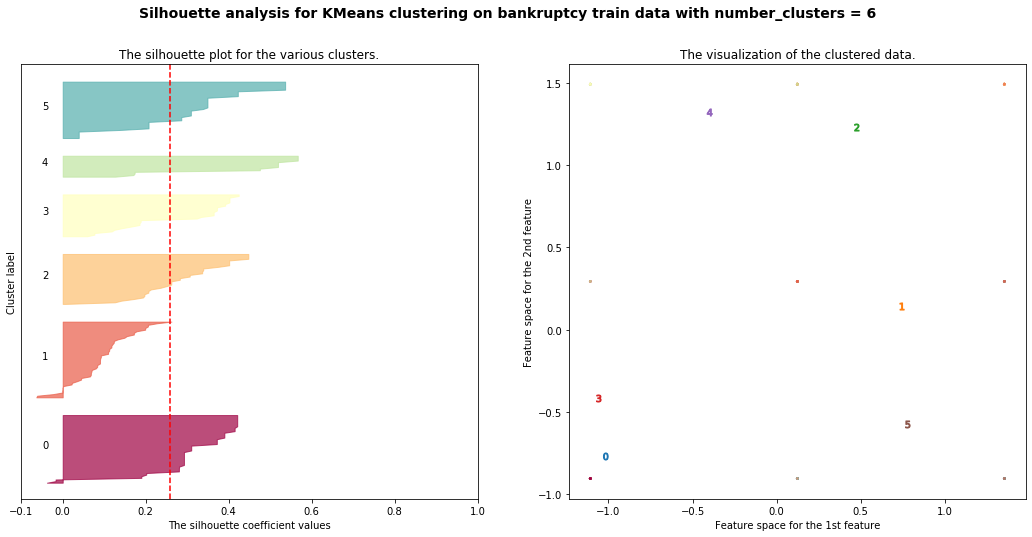

In [81]:
for number_clusters in clust_range:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (number_clusters+1)*10 is for inserting blank space between silhouette 
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (number_clusters + 1) * 10])

    # Initialize the clusterer with number_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(number_clusters, random_state=10)
    #print(clusterer)
    clusterer = clusterer.fit(X)
    clusterer_labels = clusterer.labels_     # capture the cluster lables
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    
    silhouette_avg = silhouette_score(X, clusterer_labels)
    print("For number_clusters =", number_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clusterer_labels)
    #print("For number_clusters =", number_clusters,
    #      "The sample silhouette_value is :", sample_silhouette_values)
    y_lower = 10

    for i in range(number_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clusterer_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / number_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(clusterer_labels.astype(float) / number_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.5,c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on bankruptcy train data "
        "with number_clusters = %d" % number_clusters),fontsize=14, fontweight='bold')
    plt.show()

In [31]:
# Observing the above Silhouette plots, the plot with 2 clusters seems to be optimum with equal thickness of the clusters


In [82]:
# Question 10 : Create a new column in the train data and populate it with the cluster labels
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X_train)
# Getting the cluster labels
labels = kmeans.predict(X_train)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("sklearn")
print("Centroid values")
print(centroids)  
print("labels")
print(labels)  


sklearn
Centroid values
[[0.53773585 0.52830189 0.6509434  0.77830189 0.81603774 0.52830189]
 [0.35106383 0.20744681 0.02659574 0.12234043 0.04787234 0.31382979]]
labels
[1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0
 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0
 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1]


In [84]:
X_train.shape

(200, 6)

In [85]:
len(labels)

200

In [86]:
df = pd.DataFrame(X_train)
df.insert(6, "Cluster Labels", labels, True)

In [91]:
df.shape


(200, 7)

In [93]:
X_test.shape


(50, 6)

In [96]:
labels = kmeans.predict(X_test)

In [97]:
X_test.shape

(50, 6)

In [98]:
labels.shape

(50,)

In [99]:
# Question 12:  assign cluster labels to the test data and store it as a feature
df = pd.DataFrame(X_test)
df.insert(6, "Cluster Labels", labels, True)

In [100]:
df.shape

(50, 7)

In [102]:
# Question 13: Apply SVC model on train dataset and predict target for test dataset.
from sklearn.svm import SVC
svc_model = SVC(C=0.1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)

In [103]:
# Question 14: Check accuracy and confusion matrix.
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.995
1.0


In [104]:
print("Confusion Matrix is :\n",confusion_matrix(prediction,y_test))

Confusion Matrix is :
 [[34  0]
 [ 0 16]]
